In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv(r"C:\Users\ayush\Desktop\EPLbest11-master\data.csv")


In [3]:
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
print(dataset.columns)

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
dataset = dataset.drop([ "Photo", "Flag", "Club Logo", "Body Type", "Special", "Weak Foot", "Skill Moves", "Work Rate",
                        "Real Face", "Joined", "Loaned From", "LS",  "ST", "RS", "Position", "Jersey Number",
                        "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM", "Contract Valid Until",
                        "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM",
                        "RWB", "LB", "LCB", "CB", "RCB", "RB", "Unnamed: 0",
                        "ID", "Club", "Name", "Nationality", "Preferred Foot", "International Reputation" ], axis = 1)

dataset = dataset.dropna()
dataset.head()

,Age,Overall,Potential,Value,Wage,Height,Weight,Crossing,Finishing,HeadingAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,31,94,94,€110.5M,€565K,5'7,159lbs,84.0,95.0,70.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,33,94,94,€77M,€405K,6'2,183lbs,84.0,94.0,89.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,26,92,93,€118.5M,€290K,5'9,150lbs,79.0,87.0,62.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,27,91,93,€72M,€260K,6'4,168lbs,17.0,13.0,21.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,27,91,92,€102M,€355K,5'11,154lbs,93.0,82.0,55.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
dataset = dataset.drop(["Height" , "Weight"], axis = 1)
print(dataset.columns)
print(dataset.shape)

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')
(16643, 40)


In [7]:
dataset = dataset.drop(["Release Clause"], axis = 1)

In [8]:
dataset['Wage'] = dataset['Wage'].map(lambda x: str(x)[:-1])
dataset['Wage'] = dataset['Wage'].map(lambda x: str(x)[1:])
dataset['Wage'] = pd.to_numeric(dataset['Wage'])
dataset['Value'] = dataset['Value'].map(lambda x: str(x)[1:])
l = []
y = dataset['Value'].tolist()
for i in y:
    if 'K' in i:
        i = i.replace('K', '')
        i = float(i)/1000
        l.append(i)
    elif 'M' in i:
        i = i.replace('M', '')
        i = float(i)
        l.append(i)


dataset['nValue'] = l


In [9]:
dataset = dataset.drop(["Value"], axis = 1)
dataset.sort_values("Age", inplace=True) 
dataset

,Age,Overall,Potential,Wage,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,nValue
18206,16,46,66,1,41.0,34.0,46.0,48.0,30.0,43.0,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,0.06
17841,16,52,71,1,46.0,17.0,40.0,47.0,27.0,49.0,...,40.0,46.0,54.0,55.0,14.0,14.0,11.0,11.0,15.0,0.09
18124,16,49,67,1,38.0,45.0,35.0,52.0,39.0,49.0,...,49.0,39.0,44.0,38.0,12.0,10.0,12.0,8.0,5.0,0.06
17808,16,52,71,1,26.0,52.0,66.0,45.0,50.0,54.0,...,51.0,29.0,23.0,21.0,6.0,12.0,9.0,15.0,7.0,0.10
17115,16,55,77,1,57.0,44.0,47.0,60.0,34.0,55.0,...,48.0,52.0,54.0,52.0,14.0,15.0,11.0,12.0,5.0,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,40,73,73,6,12.0,19.0,10.0,23.0,9.0,14.0,...,44.0,12.0,13.0,11.0,76.0,73.0,78.0,67.0,71.0,0.27
7225,41,68,68,1,25.0,15.0,13.0,36.0,12.0,22.0,...,62.0,18.0,14.0,19.0,67.0,65.0,68.0,71.0,68.0,0.06
15426,41,59,59,1,19.0,8.0,19.0,26.0,15.0,17.0,...,57.0,24.0,16.0,17.0,61.0,54.0,54.0,63.0,55.0,0.01
10545,42,65,65,1,23.0,11.0,23.0,29.0,19.0,30.0,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,0.04


In [10]:
dataset.sort_values("Age", inplace=True) 
dataset

,Age,Overall,Potential,Wage,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,nValue
18206,16,46,66,1,41.0,34.0,46.0,48.0,30.0,43.0,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,0.06
18044,16,50,74,1,36.0,27.0,44.0,41.0,22.0,50.0,...,32.0,47.0,50.0,47.0,9.0,13.0,8.0,12.0,9.0,0.06
11457,16,64,86,5,52.0,65.0,56.0,55.0,66.0,62.0,...,63.0,27.0,21.0,19.0,5.0,13.0,6.0,15.0,14.0,1.00
18106,16,50,72,1,11.0,7.0,10.0,24.0,5.0,8.0,...,30.0,7.0,12.0,11.0,47.0,55.0,58.0,45.0,50.0,0.05
17354,16,54,71,1,34.0,40.0,48.0,55.0,32.0,53.0,...,41.0,20.0,35.0,34.0,5.0,10.0,12.0,15.0,9.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2821,40,73,73,6,12.0,19.0,10.0,23.0,9.0,14.0,...,44.0,12.0,13.0,11.0,76.0,73.0,78.0,67.0,71.0,0.27
7225,41,68,68,1,25.0,15.0,13.0,36.0,12.0,22.0,...,62.0,18.0,14.0,19.0,67.0,65.0,68.0,71.0,68.0,0.06
15426,41,59,59,1,19.0,8.0,19.0,26.0,15.0,17.0,...,57.0,24.0,16.0,17.0,61.0,54.0,54.0,63.0,55.0,0.01
10545,42,65,65,1,23.0,11.0,23.0,29.0,19.0,30.0,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,0.04


In [11]:
print(dataset.describe)

<bound method NDFrame.describe of        Age  Overall  Potential  Wage  Crossing  Finishing  HeadingAccuracy  \
18206   16       46         66     1      41.0       34.0             46.0   
18044   16       50         74     1      36.0       27.0             44.0   
11457   16       64         86     5      52.0       65.0             56.0   
18106   16       50         72     1      11.0        7.0             10.0   
17354   16       54         71     1      34.0       40.0             48.0   
...    ...      ...        ...   ...       ...        ...              ...   
2821    40       73         73     6      12.0       19.0             10.0   
7225    41       68         68     1      25.0       15.0             13.0   
15426   41       59         59     1      19.0        8.0             19.0   
10545   42       65         65     1      23.0       11.0             23.0   
4741    45       71         71     8      19.0       14.0             24.0   

       ShortPassing  Volleys 

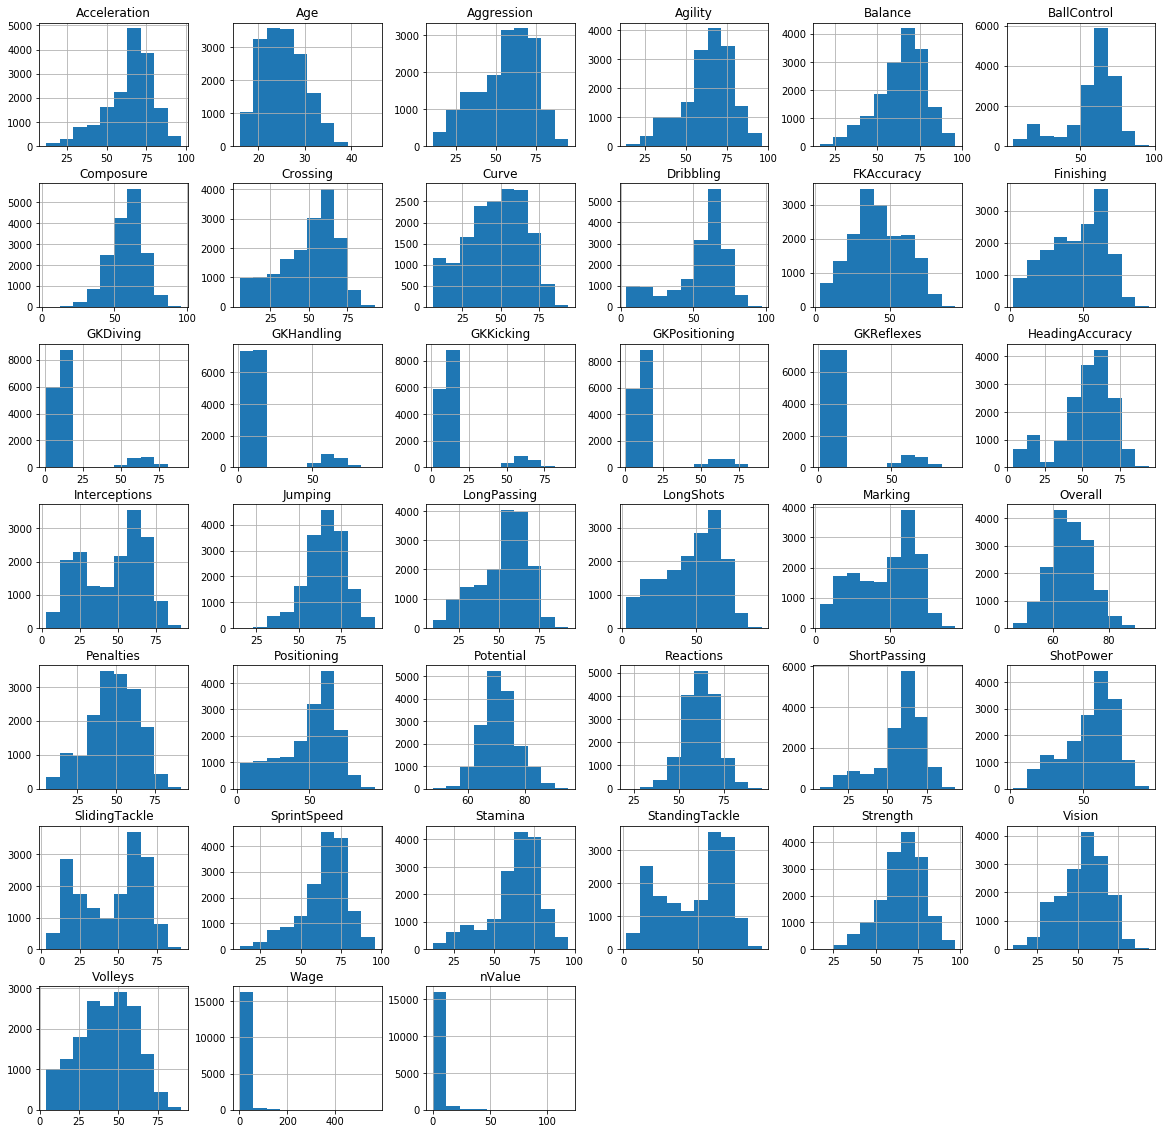

In [12]:
# Plot histograms of each parameter 
dataset.hist(figsize = (20, 20))
plt.show()

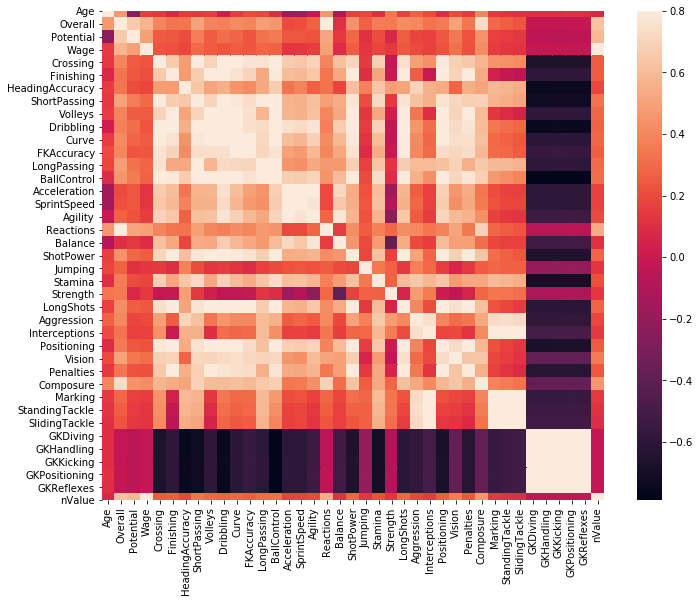

In [13]:
# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [14]:
from sklearn import model_selection
array = dataset.values
X = array[:,0:-1]
Y = array[:,-1]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [17]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=100
model = RandomForestRegressor(random_state=0, n_estimators=n_estimators)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,Y_train)

print("coefficient of determination R^2 of the prediction:",model_score)
Y_predicted = model.predict(X_validation)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Y_validation, Y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_validation, Y_predicted))


coefficient of determination R^2 of the prediction: 0.996891982348615
Mean squared error: 0.67
Test Variance score: 0.98


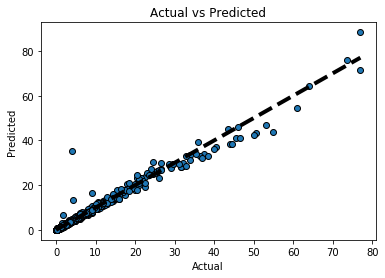

In [22]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_validation, Y_predicted, edgecolors=(0, 0, 0))

ax.plot([Y_validation.min(), Y_validation.max()], [Y_validation.min(), Y_validation.max()], 'k--', lw=4)

ax.set_xlabel('Actual')

ax.set_ylabel('Predicted')

ax.set_title("Actual vs Predicted")

plt.show()